In [1]:
import pandas as pd

In [12]:
df = pd.read_excel("C:/Users/bsully/Downloads/data.xlsx", sheet_name='all')

In [13]:
df.head(n=5)

,mark,pavitt,age,country,region,sector,pav,years,core_p,turnov,...,labour_flex,credit_req,credit_obt,fam_managed,fam_ceo,for_group,decentr_manag,bonus.1,qual_cert,comp
0,40,Specialized industries,More than 20 yrs,AUT,122,11,2,3,100.0,7.0,...,1,0,0,0,0,1,1,0,1,1
1,41,Traditional industries,More than 20 yrs,AUT,122,4,1,3,100.0,6.0,...,0,0,0,0,1,0,1,1,1,1
2,42,Economies of scale industries,More than 20 yrs,AUT,116,10,3,3,100.0,6.0,...,1,1,1,0,1,1,0,0,1,1
3,43,Traditional industries,Between 20 and 6 yrs,AUT,122,1,1,2,100.0,3.0,...,1,0,0,0,1,0,0,0,0,0
4,44,Traditional industries,More than 20 yrs,AUT,122,4,1,3,95.0,2.0,...,1,0,0,1,1,0,0,1,0,1


In [14]:
df.shape

(14759, 489)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14759 entries, 0 to 14758
Columns: 489 entries, mark to comp
dtypes: float64(438), int64(48), object(3)
memory usage: 55.1+ MB


In [16]:
#On va regarder quelles sont les valeurs manquantes 
miss=df.isna().sum()
pd.options.display.max_rows=None
print(miss)

mark                         0
pavitt                       0
age                          0
country                      0
region                       0
sector                       0
pav                          0
years                        0
core_p                      28
turnov                      36
flop                        21
group                        0
group_position           11510
acquire                      6
acquired                     0
affiliate                    7
foreign_affiliate        13653
first_share                604
first_share_type           459
first_share_naz            424
a16_2                     3805
a18_2                     4451
a19_2                     4442
a16_3                     6246
a18_3                     8268
a19_3                     8262
a16_4                     8064
family                      13
ceo_type                  4394
strategy                   522
strategy_evolution         528
fin_benefit                522
non_fin_

## Traitement des valeurs manquantes ##

In [17]:
# On conserve les variables (colonnes) qui ont au moins 80% de valeurs (donc au maximum 20% de valeurs manquantes) 
df.dropna(how='any',axis=1,thresh=df.shape[0]*0.99, inplace=True)

#On va regarder quelles sont les valeurs manquantes - 2ème partie
df.isna().sum()
#pd.options.display.max_rows=None
#print(miss)

mark                      0
pavitt                    0
age                       0
country                   0
region                    0
sector                    0
pav                       0
years                     0
core_p                   28
turnov                   36
flop                     21
group                     0
acquire                   6
acquired                  0
affiliate                 7
family                   13
no_rewards                0
empl                      0
no_family_p               0
no_family_n               0
family_p                  0
family_n                  0
family_tmt                0
involv_p                  0
involv_n                  0
grad_p                    0
grad_n                    0
fixed_contract           67
part_time                42
ceo_age                  38
ceo_gender               15
abroad_exp_executives    54
training                 87
adsl                      7
c4_m_c1                   3
c4_m_c2             

In [18]:
df.shape

(14759, 137)

In [6]:
pd.set_option('display.max_rows', 14759)

In [19]:
df.isna().sum()

mark                      0
pavitt                    0
age                       0
country                   0
region                    0
sector                    0
pav                       0
years                     0
core_p                   28
turnov                   36
flop                     21
group                     0
acquire                   6
acquired                  0
affiliate                 7
family                   13
no_rewards                0
empl                      0
no_family_p               0
no_family_n               0
family_p                  0
family_n                  0
family_tmt                0
involv_p                  0
involv_n                  0
grad_p                    0
grad_n                    0
fixed_contract           67
part_time                42
ceo_age                  38
ceo_gender               15
abroad_exp_executives    54
training                 87
adsl                      7
c4_m_c1                   3
c4_m_c2             

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
#Matrice de corrélation de toutes les variables numériques 
plt.figure(figsize=(100, 70))
sns.heatmap(df.corr(), annot=True, cmap='viridis') 

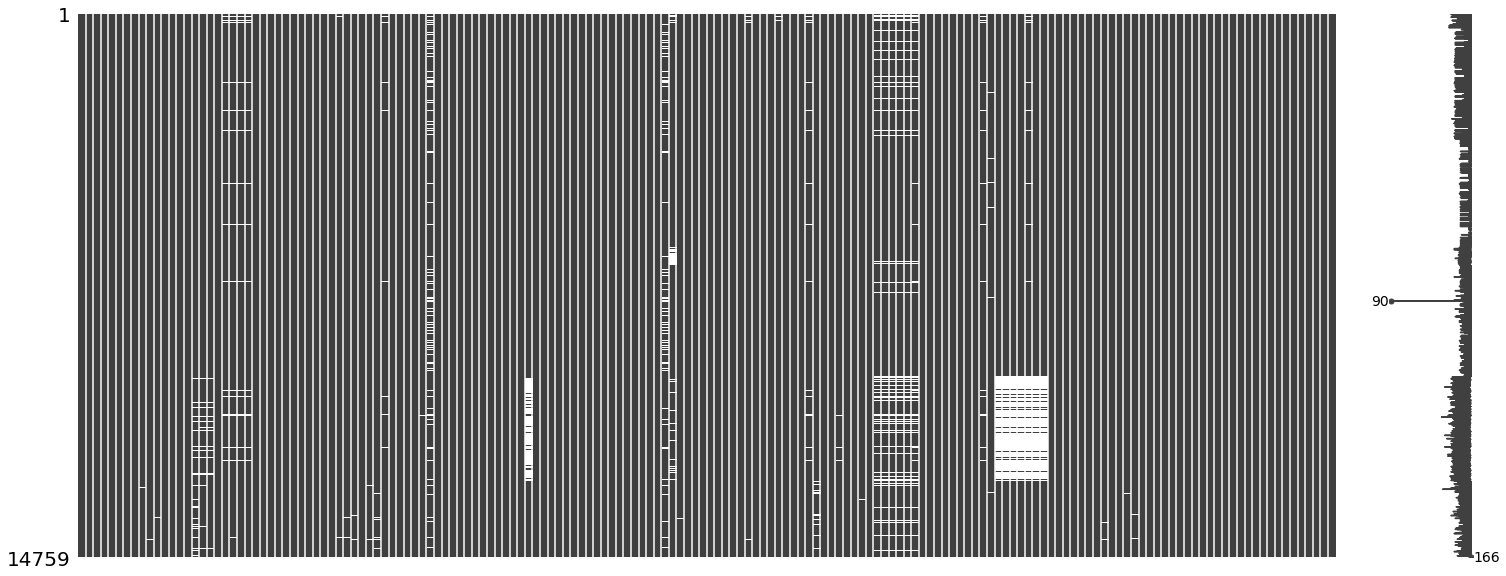

In [14]:
msno.matrix(df) 

In [21]:
#Fonction permettant d'appliquer le mode pour chaque variable ayant les 1% de valeurs manquantes
col_variables_NA = list(df)
for i in range (0,len(col_variables_NA)-1):
    if (df[col_variables_NA[i]].isna().sum()) : #<=3000 
        df[col_variables_NA[i]].fillna(df[col_variables_NA[i]].mode()[0], inplace=True)

In [22]:
miss=df.isna().sum()
print(miss)

mark                     0
pavitt                   0
age                      0
country                  0
region                   0
sector                   0
pav                      0
years                    0
core_p                   0
turnov                   0
flop                     0
group                    0
acquire                  0
acquired                 0
affiliate                0
family                   0
no_rewards               0
empl                     0
no_family_p              0
no_family_n              0
family_p                 0
family_n                 0
family_tmt               0
involv_p                 0
involv_n                 0
grad_p                   0
grad_n                   0
fixed_contract           0
part_time                0
ceo_age                  0
ceo_gender               0
abroad_exp_executives    0
training                 0
adsl                     0
c4_m_c1                  0
c4_m_c2                  0
c4_m_c3                  0
c

In [ ]:
msno.matrix(df) 

In [258]:
df.shape

(14759, 137)

## Transformation des numériques en Binaires ##

In [14]:
len(list(df))

166

In [24]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)

In [ ]:
# identifier l'ensemble des variables numériques et determiner le nombre de modalités pour chaque variable
var_num = [col for col in numerical_vars if df[col].dtype] 
#var_cate
for col in var_num:
    print(f"La variable {col} contient {df[col].nunique()} modalités") 

In [223]:
df2=df.copy()

In [224]:
df2.drop(columns=['mark','no_family_p','no_family_n','family_p','family_n','family_tmt','involv_p','involv_n', 'grad_p','grad_n', 'rel_weight', 
                'abs_weight','core_p'], inplace= True)

In [225]:
df2.shape

(14759, 124)

In [226]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df2.select_dtypes(include=numerics).columns)

In [ ]:
# identifier l'ensemble des variables numériques et determiner le nombre de modalités pour chaque variable
var_num = [col for col in numerical_vars if df2[col].dtype] 
#var_cate
for col in var_num:
    print(f"La variable {col} contient {df2[col].nunique()} modalités") 

In [128]:
df2.flop.nunique()

5

In [200]:
df2.drop(['region', 'pav', 'years',	'turnov', 'flop'], axis=1, inplace=True)

In [222]:
df.region.nunique()

166

In [228]:
df.head()

,mark,pavitt,age,country,region,sector,pav,years,core_p,turnov,...,labour_flex,credit_req,credit_obt,fam_managed,fam_ceo,for_group,decentr_manag,bonus.1,qual_cert,comp
0,40,Specialized industries,More than 20 yrs,AUT,122,11,2,3,100.0,7.0,...,1,0,0,0,0,1,1,0,1,1
1,41,Traditional industries,More than 20 yrs,AUT,122,4,1,3,100.0,6.0,...,0,0,0,0,1,0,1,1,1,1
2,42,Economies of scale industries,More than 20 yrs,AUT,116,10,3,3,100.0,6.0,...,1,1,1,0,1,1,0,0,1,1
3,43,Traditional industries,Between 20 and 6 yrs,AUT,122,1,1,2,100.0,3.0,...,1,0,0,0,1,0,0,0,0,0
4,44,Traditional industries,More than 20 yrs,AUT,122,4,1,3,95.0,2.0,...,1,0,0,1,1,0,0,1,0,1


In [248]:
group = df2.groupby(by='pavitt').mean()
group

,region,sector,pav,years,turnov,flop,group,acquire,acquired,affiliate,...,labour_flex,credit_req,credit_obt,fam_managed,fam_ceo,for_group,decentr_manag,bonus.1,qual_cert,comp
pavitt,,,,,,,,,,,,,,,,,,,,,
Economies of scale industries,84.973960,6.559195,3.0,2.525906,4.832215e+07,2.504161,2.542819,2.684567e+06,3.886174,3.482685e+00,...,0.815839,0.123758,0.084564,0.210201,0.555168,0.125906,0.312752,0.408859,0.646443,0.526711
High-tech industries,87.929012,8.401235,4.0,2.469136,1.234568e+08,2.828704,2.503086,3.632716e+00,3.858025,3.496914e+00,...,0.833333,0.100309,0.072531,0.219136,0.527778,0.175926,0.353395,0.470679,0.734568,0.626543
Specialized industries,87.311069,8.565854,2.0,2.508443,5.253284e+07,2.537336,2.632270,3.752349e+06,3.862289,3.538086e+00,...,0.815385,0.135835,0.100938,0.220263,0.612008,0.127580,0.313321,0.419887,0.637148,0.637148
Traditional industries,88.122922,2.970300,1.0,2.500782,7.105301e+07,2.562882,2.728151,3.793804e+00,3.914452,1.421064e+06,...,0.815973,0.146796,0.103169,0.283217,0.673867,0.043627,0.246412,0.311781,0.539577,0.461987
no available,91.046784,6.220760,0.0,2.492690,1.315790e+08,2.663743,2.554094,3.730994e+00,3.877193,3.438596e+00,...,0.776316,0.111111,0.073099,0.233918,0.571637,0.103801,0.263158,0.394737,0.595029,0.587719


In [137]:
# group = group.reset_index()

In [188]:
# group

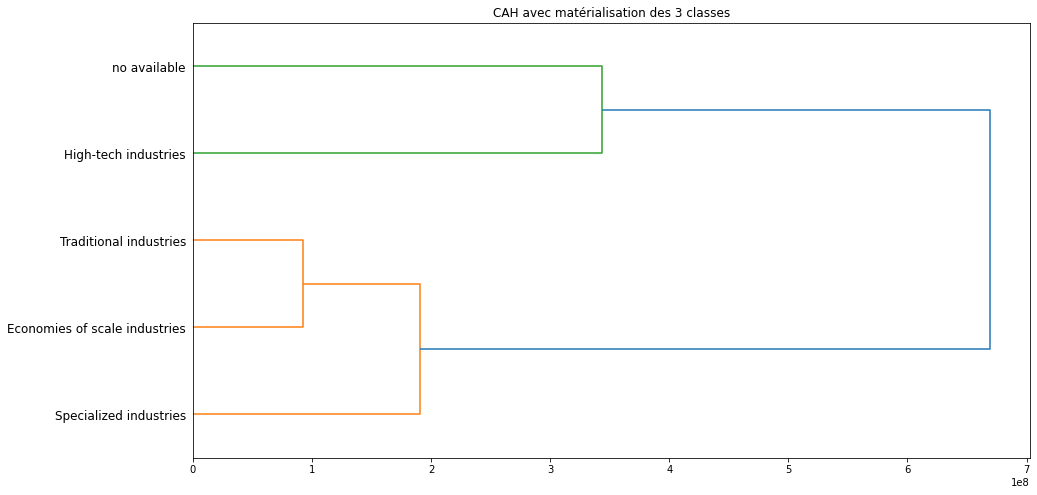

In [266]:
# importation des outils 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#CAH
Z = linkage(group, method='ward',metric='euclidean')

#affichage du dendogramme
plt.figure(figsize=(15, 8))
plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,labels=group.index,orientation='right')
plt.show()

In [265]:
# import scipy.cluster.hierarchy as sch
# groupes_cah = sch.fcluster(Z,t=10,criterion='distance') 
# print(np.unique(groupes_cah).size, "groupes constitués")

In [264]:
# group

In [263]:
# groupes_cah = fcluster(Z,t=3,criterion='distance')
# print(groupes_cah)

In [262]:
# import numpy as np
# idg = np.argsort(groupes_cah)
# #affichage des observations et leurs groupes
# print(pd.DataFrame(group.index[idg],groupes_cah[idg]))

In [261]:
# from sklearn.cluster import AgglomerativeClustering

# ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(group)
# ward

In [260]:
# group

In [18]:
# # sélection de variables numériques 3 ou + de modalités 
# for col in var_num:
#     if df2[col].nunique() >=3:
#         dummies = [col]
#         df2 = pd.get_dummies(df2, columns=dummies, drop_first=True)

In [259]:
# df2.head(n=10)

In [20]:
df2.shape

(14759, 1859)

In [12]:
#df = pd.get_dummies(df, columns = ["age","pavitt","country"], prefix=col+'_')

## ACM ##

In [22]:
!pip install prince

You should consider upgrading via the 'c:\users\neals\anaconda3\python.exe -m pip install --upgrade pip' command.


In [21]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from prince import MCA

In [22]:
df2.head(n=3)

,pavitt,age,country,no_rewards,c4_m_c1,c4_m_c2,c4_m_c3,c4_m_c4,prod_inn,proc_inn,...,eb_100.0,e10_2.0,e10_3.0,e10_4.0,e10_5.0,e10_9999999999.0,e15_2.0,e15_3.0,e15_4.0,e15_9999999999.0
0,Specialized industries,More than 20 yrs,AUT,1,1.0,1.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0,0,0,1,0,0
1,Traditional industries,More than 20 yrs,AUT,0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,0,0,0
2,Economies of scale industries,More than 20 yrs,AUT,0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,1,0,0,0,0,0,1,0,0


In [14]:
#df2 = df.copy()

In [15]:
#df2.shape

(14759, 34717)

In [23]:
mca = MCA(n_components = 1842)
mca.fit(df2)

MCA(n_components=1842)

In [24]:
print(mca.eigenvalues_)
print(mca.total_inertia_)
print(mca.explained_inertia_)

[0.13676736359744093, 0.12918652349666276, 0.10204040656333006, 0.09003363117852303, 0.08275679798271258, 0.08131770344770901, 0.08037586659527934, 0.07464245154703493, 0.07124099025705487, 0.06983087365228077, 0.06940426282997911, 0.06916443369055561, 0.06845905886563615, 0.06751792759062607, 0.06626112730485093, 0.06403145740115897, 0.06384464037472211, 0.06293263070617348, 0.062285356428578145, 0.06175663296281064, 0.06126116542681358, 0.06105705407614768, 0.06080362989871626, 0.06056001625349051, 0.05994123610952781, 0.059672310188152444, 0.05955834308977999, 0.05924215521251876, 0.05894401158622973, 0.05856959402640274, 0.05824594503776562, 0.05731795098442749, 0.05652145281350286, 0.056152571532630834, 0.055641955873755325, 0.05516168214929709, 0.05481223712041999, 0.05436085906777937, 0.05413798798296134, 0.05277919994211841, 0.05256844070714895, 0.05220005711007469, 0.05187653940268208, 0.051577280950560175, 0.05129133106503957, 0.05119056629061925, 0.05026435579110656, 0.04996

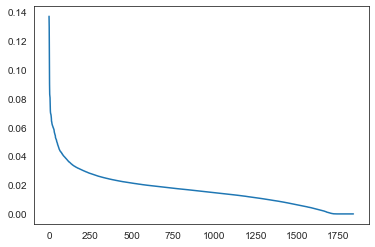

In [25]:
Valeurs_propres=mca.eigenvalues_
plt.plot(Valeurs_propres)

In [28]:
eig = pandas.DataFrame(
    { 
        "Dimension" : ["Dim" + str(x + 1) for x in range(1842)],
        "Valeur propre": mca.eigenvalues_,
        "% variance expliquée": numpy.round(mca.explained_inertia_, 4) * 100,
        "% variance expliquée cumulée": numpy.round(numpy.cumsum(mca.explained_inertia_), 4) * 100,
    }
)
eig

,Dimension,Valeur propre,% variance expliquée,% variance expliquée cumulée
0,Dim1,1.367674e-01,2118.75,2118.75
1,Dim2,1.291865e-01,2001.31,4120.07
2,Dim3,1.020404e-01,1580.78,5700.84
3,Dim4,9.003363e-02,1394.77,7095.62
4,Dim5,8.275680e-02,1282.04,8377.66
5,Dim6,8.131770e-02,1259.75,9637.40
6,Dim7,8.037587e-02,1245.16,10882.56
7,Dim8,7.464245e-02,1156.34,12038.90
8,Dim9,7.124099e-02,1103.64,13142.54
9,Dim10,6.983087e-02,1081.80,14224.33


In [32]:
#print(pd.DataFrame(np.transpose(mca.eigenvalues_),columns=['Val. Abs','Val. %','Cumul %']))
numpy.cumsum(mca.explained_inertia_)

array([  21.18754408,   41.20068968,   57.00844933, ..., 4870.47720885,
       4870.47720885, 4870.47720885])

In [29]:
# Représentation des individus
df_ind = pandas.DataFrame(mca.row_coordinates(df2)).rename(columns = {i: "Dim"+str(i+1) for i in range(1842)})
df_ind.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,Dim8,Dim9,Dim10,...,Dim1833,Dim1834,Dim1835,Dim1836,Dim1837,Dim1838,Dim1839,Dim1840,Dim1841,Dim1842
0,1.054365,-0.352843,0.221281,-0.018310,-0.397786,0.143578,0.025019,-0.063097,-0.034325,0.008870,...,0.005356,-0.010693,0.001165,-0.012912,0.011203,-0.006726,-0.037953,0.028555,-0.048591,-0.01927
1,1.782665,4.086180,1.448904,0.041041,-0.059042,-0.040611,0.163329,-0.481453,-0.235766,-0.009933,...,0.005356,-0.010693,0.001165,-0.012912,0.011203,-0.006726,-0.037953,0.028555,-0.048591,-0.01927
2,0.791373,-0.320391,0.218407,-0.011626,-0.259719,0.093649,0.117075,-0.132753,-0.041223,0.034342,...,0.005356,-0.010693,0.001165,-0.012912,0.011203,-0.006726,-0.037953,0.028555,-0.048591,-0.01927
3,-0.166283,-0.005835,0.051880,-0.016519,-0.197921,0.087158,0.061153,-0.126140,-0.089990,-0.008289,...,0.005356,-0.010693,0.001165,-0.012912,0.011203,-0.006726,-0.037953,0.028555,-0.048591,-0.01927
4,0.207453,-0.143403,0.083795,0.003896,0.099236,-0.090193,0.087152,-0.216760,-0.180464,-0.063224,...,0.005356,-0.010693,0.001165,-0.012912,0.011203,-0.006726,-0.037953,0.028555,-0.048591,-0.01927


In [31]:
df_ind.shape

(14759, 1842)

In [ ]:
df3 = df_ind.iloc[ :,0:40 ]

In [ ]:
df3.shape

## Clustering ##